<a href="https://colab.research.google.com/github/akarsh1207/Time-Series-Forecasting-and-Filtering/blob/main/Lorenz_%2B_Rosslers_Attractors_%2B_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lorenz/Rossler Attractor with Noise
___

##Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install colorednoise
import colorednoise as cn
import pdb
plt.close('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Parameter definitions

In [2]:
"""

	Parameters
	----------
	system : string
		Type of system to solve (`lorenz_stochastic`, `rossler_stochastic`, or
	   `noise`). The default is `lorenz_stochastic`.
	observables : list
		Which variables are observed (0 is x, 1 is y, 2 is z).
		The default is [0].
	length : int
		Time series length. The default is 10000.
	x0 : list
		Starting condition. If None, a random starting condition is selected.
		The default is None.
	p : list
		List of system parameters. The default is for the Lorenz system:
		[10.0, 8.0/3.0, 28.0].
	step : int
		Integration step. The default is 0.001.
	sample : int
		Temporal sampling at output. The default is 0.03.
	discard : int
		Number of steps to discard at the beginning. The default is 1000.
	epsilon_sde : float
		Intensity of noise perturbing the dynamics. The default is 0.0.
	epsilon_add : float
		Intensity of observational noise. The default is 0.0.
	beta_add : int
		Exponent to characterize the power spectrum of the observational noise.
		For white noise beta_add = 0.0 (gaussian).
		For pink noise beta_add = 1.0 (flicker).
		For red noise beta_add = 2.0 (Browinan).
		The default is 0.0.

	Returns
	-------
	t_obs : array
		Time stamps at which the observation is taken.
	X_obs : 2-d array
		Observed time series.
	t_gen : array
		Time stamps at which the system has been integrated.
	X_gen : 2-d array
		Generated time series (i.e., without observational noise added).

	"""

'\n\n\tParameters\n\t----------\n\tsystem : string\n\t\tType of system to solve (`lorenz_stochastic`, `rossler_stochastic`, or\n\t   `noise`). The default is `lorenz_stochastic`.\n\tobservables : list\n\t\tWhich variables are observed (0 is x, 1 is y, 2 is z).\n\t\tThe default is [0].\n\tlength : int\n\t\tTime series length. The default is 10000.\n\tx0 : list\n\t\tStarting condition. If None, a random starting condition is selected.\n\t\tThe default is None.\n\tp : list\n\t\tList of system parameters. The default is for the Lorenz system:\n\t\t[10.0, 8.0/3.0, 28.0].\n\tstep : int\n\t\tIntegration step. The default is 0.001.\n\tsample : int\n\t\tTemporal sampling at output. The default is 0.03.\n\tdiscard : int\n\t\tNumber of steps to discard at the beginning. The default is 1000.\n\tepsilon_sde : float\n\t\tIntensity of noise perturbing the dynamics. The default is 0.0.\n\tepsilon_add : float\n\t\tIntensity of observational noise. The default is 0.0.\n\tbeta_add : int\n\t\tExponent to 

## Lorenz Stochastic

In [3]:
def _gen_lorenz_stochastic(length=10000, x0=None, sigma=10.0, \
						beta=8.0/3.0, rho=28.0,step=0.001, \
						sample=0.03, discard=1000, \
						epsilon_sde=0.0, observables=[0]):

	if not x0:
		x0 = (0.0, -0.01, 9.0) + 0.25 * (-1 + 2 * np.random.random(3))

	sample = int(sample / step)
	t = np.linspace(0, (sample * (length + discard)) * step, \
								  sample * (length + discard))
	Nt_simulation = len(t)
	X = np.zeros((Nt_simulation,3))
	X[0,:] = x0

	for tt in range(Nt_simulation-1):
		r = np.random.randn(3)
		X[tt+1,0] = X[tt,0] + (sigma * (X[tt,1] - X[tt,0])) * \
			step + epsilon_sde*np.sqrt(step)*r[0]
		X[tt+1,1] = X[tt,1] + (X[tt,0] * (rho - X[tt,2]) - \
			X[tt,1])*step + epsilon_sde*np.sqrt(step)*r[1]
		X[tt+1,2] = X[tt,2] + (X[tt,0] * X[tt,1] - beta * X[tt,2]) * \
			step + epsilon_sde*np.sqrt(step)*r[2]
	t_gen = t[discard*sample:]
	t_gen = t_gen-t_gen[0]
	X_gen = X[discard*sample:,:]
	t_obs = t[discard*sample::sample]
	t_obs = t_obs-t_obs[0]
	X_obs = X[discard*sample::sample, observables]
	return t_obs,X_obs,t_gen,X_gen


##Rossler Stochastic

In [4]:
def _gen_rossler_stochastic(length=10000, x0=None, a=0.2, b=0.2, c=5.7, \
						 step=0.001, sample=0.03, discard=1000, \
						 epsilon_sde=0.0, observables=[0]):

	if not x0:
		x0 = (-9.0, 0.0, 0.0) + 0.25 * (-1 + 2 * np.random.random(3))

	sample = int(sample / step)
	t = np.linspace(0, (sample * (length + discard)) * step, \
			  sample * (length + discard))

	Nt_simulation = len(t)
	X = np.zeros((Nt_simulation,3))
	X[0,:] = x0

	for tt in range(Nt_simulation-1):
		r = np.random.randn(1)
		X[tt+1,0] = X[tt,0] - (X[tt,1] + X[tt,2])*step + \
									epsilon_sde*np.sqrt(step)*r[0]
		X[tt+1,1] = X[tt,1] + (X[tt,0] + a*X[tt,1])*step
		X[tt+1,2] = X[tt,2] + (b + X[tt,2] * (X[tt,0]-c)) * step
		if np.isnan(X[tt+1,0]):
			pdb.set_trace()
		if np.isnan(X[tt+1,1]):
			pdb.set_trace()
		if np.isnan(X[tt+1,2]):
			pdb.set_trace()
	t_gen = t[discard*sample:]
	t_gen = t_gen-t_gen[0]
	X_gen = X[discard*sample:,:]
	t_obs = t[discard*sample::sample]
	t_obs = t_obs-t_obs[0]
	X_obs = X[discard*sample::sample, observables]

	return t_obs,X_obs,t_gen,X_gen

##Generation function

In [5]:
def _gen_data(system='lorenz_stochastic', observables=[0], \
		   length=10000, x0=None, p=[ 10,8.0/3.0, 28], step=0.001, \
		   sample=0.03, discard=1000, epsilon_sde=0.0, epsilon_add=0.0, \
		   beta_add=0.0):
		
	if system=='lorenz_stochastic':
		t_obs, X_obs, t_gen, X_gen = \
						_gen_lorenz_stochastic(length=length, \
							   x0=x0, sigma=p[0], beta=p[1], rho=p[2],\
							   step=step, sample=sample, \
							   discard=discard, \
							   epsilon_sde=epsilon_sde, \
							   observables=observables)
	elif system=='rossler_stochastic':
		t_obs, X_obs, t_gen, X_gen = \
						_gen_rossler_stochastic(length=length, \
							   x0=x0, a=p[0], b=p[1], c=p[2], \
							   step=step, sample=sample, \
							   discard=discard, \
							   epsilon_sde=epsilon_sde, \
							   observables=observables)
	elif system=='noise':
		Nx = len(observables)
		t_obs = np.arange(0,length*sample,sample)
		X_obs = np.zeros((t_obs.shape[0],Nx))
		t_gen = np.arange(0,length*step,step)
		X_gen = np.zeros((t_gen.shape[0],Nx))

	Nt,Nx = X_obs.shape
	for ii in np.arange(Nx):
		X_obs[:,ii] = X_obs[:,ii] + \
				epsilon_add * cn.powerlaw_psd_gaussian(beta_add, Nt)
	
	return t_obs, X_obs, t_gen, X_gen

In [6]:
A = _gen_data(observables=[0,1,2])
print(A)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[ 2.46982107,  3.88931756, 14.59552004],
       [ 2.96475715,  4.87637902, 13.81240152],
       [ 3.62202278,  6.13233977, 13.26742   ],
       ...,
       [ 9.73528204, 12.8058215 , 24.45295733],
       [10.60005773, 13.21232319, 26.40282688],
       [11.26693472, 13.00116839, 28.53124743]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[ 2.46982107,  3.88931756, 14.59552004],
       [ 2.48401604,  3.91853491, 14.56620458],
       [ 2.49836122,  3.94798613, 14.53709507],
       ...,
       [11.59633626, 12.21919704, 30.32977679],
       [11.60256487, 12.17996097, 30.3905953 ],
       [11.60833883, 12.14004397, 30.4508725 ]]))


In [39]:
a = A[3]
x = a[:,0]
y = a[:,1]
z = a[:,2]

In [40]:
a_obs = A[1]
x_obs = a_obs[:,0]
y_obs = a_obs[:,1]
z_obs = a_obs[:,2]

In [41]:
t_obs = A[0]
t_gen = A[2]

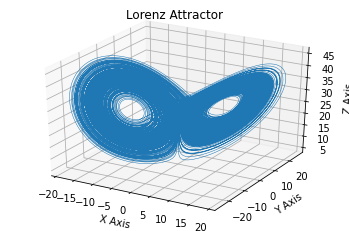

In [42]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x,y,z, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor")

plt.show()

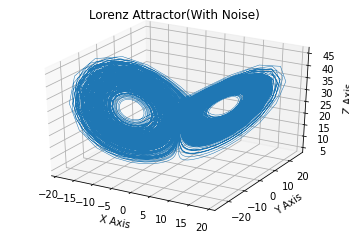

In [43]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x_obs,y_obs,z_obs, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor(With Noise)")

plt.show()

##Plots

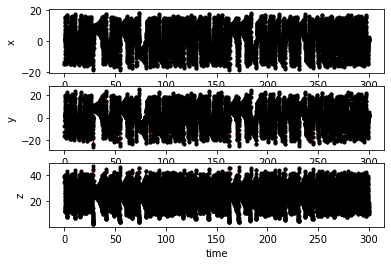

In [44]:
def main():
	t_obs, X_obs, t_gen, X_gen = _gen_data(system='lorenz_stochastic',
											observables=[0,1,2],
											length=10000,
											x0=None,
											p=[10, 8.0/3.0, 28],
											step=0.001,
											sample=0.03,
											discard=1000,
											epsilon_sde=0.0,
											epsilon_add=0.0,
											beta_add=0.0)
	ylabel = ['x','y','z']
	plt.figure()
	for ii in range(3):
		plt.subplot(3,1,ii+1)
		plt.plot(t_gen, X_gen[:,ii],'--r')
		plt.plot(t_obs, X_obs[:,ii],'.k')
		plt.ylabel(ylabel[ii])
		if ii==2: plt.xlabel('time')
	
if __name__ == '__main__':
	main()

#Extension to the Code
___

##Forming a Univariate Series for X Y Z generated:

In [143]:
def univariate_series(sequence, n_steps):
  X1, Y1 = list(), list()
  for i in range(7000):
    end_input = i + n_steps
    if end_input > 6989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1.append(seq_x)
    Y1.append(seq_y)
  return np.array(X1), np.array(Y1)

X1, Y1 = univariate_series(x_obs,100)

def univariate_series1(sequence, n_steps):
  X1_t, Y1_t = list(), list()
  for i in range(7000,10000):
    end_input = i + n_steps
    if end_input > 9989:
      break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1_t.append(seq_x)
    Y1_t.append(seq_y)
  return np.array(X1_t), np.array(Y1_t)
X1_t, Y1_t = univariate_series1(x_obs,100)

In [144]:
def univariate_series(sequence, n_steps):
  X2, Y2 = list(), list()
  for i in range(7000):
    end_input = i + n_steps
    if end_input > 6989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2.append(seq_x)
    Y2.append(seq_y)
  return np.array(X2), np.array(Y2)

X2, Y2 = univariate_series(y_obs,100)

def univariate_series1(sequence, n_steps):
  X2_t, Y2_t = list(), list()
  for i in range(7000,10000):
    end_input = i + n_steps
    if end_input > 9989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2_t.append(seq_x)
    Y2_t.append(seq_y)
  return np.array(X2_t), np.array(Y2_t)
X2_t, Y2_t = univariate_series1(y_obs,100)

In [145]:
def univariate_series(sequence, n_steps):
  X3, Y3 = list(), list()
  for i in range(7000):
    end_input = i + n_steps
    if end_input > 6989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3.append(seq_x)
    Y3.append(seq_y)
  return np.array(X3), np.array(Y3)

X3, Y3 = univariate_series(z_obs,100)

def univariate_series1(sequence, n_steps):
  X3_t, Y3_t = list(), list()
  for i in range(7000,10000):
    end_input = i + n_steps
    if end_input > 9989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3_t.append(seq_x)
    Y3_t.append(seq_y)
  return np.array(X3_t), np.array(Y3_t)
X3_t, Y3_t = univariate_series1(z_obs,100)

##Input Vector Creation

In [146]:
New_X = np.stack([X1,X2,X3], axis=1)
New_Y = np.stack([Y1,Y2,Y3], axis=1)

##Test Vector Creation

In [148]:
New_X_t = np.stack([X1_t,X2_t,X3_t], axis=1)
New_Y_t = np.stack([Y1_t,Y2_t,Y3_t], axis=1)

#MLP Model Unfiltered
___

##MLP Model

In [353]:
import tensorflow as tf 
mlp = tf.keras.models.Sequential()
mlp.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=10))
mlp.compile(optimizer = 'Adam', loss = 'mse')
mlp.fit(New_X,New_Y, batch_size = 1, epochs = 100)

Epoch 1/100
6890/6890 [==============================] - 9s 1ms/step - loss: 210.7354
Epoch 2/100
6890/6890 [==============================] - 9s 1ms/step - loss: 137.7509
Epoch 3/100
6890/6890 [==============================] - 9s 1ms/step - loss: 90.2825
Epoch 4/100
6890/6890 [==============================] - 10s 1ms/step - loss: 66.4552
Epoch 5/100
6890/6890 [==============================] - 9s 1ms/step - loss: 54.4170
Epoch 6/100
6890/6890 [==============================] - 9s 1ms/step - loss: 47.9895
Epoch 7/100
6890/6890 [==============================] - 9s 1ms/step - loss: 44.1495
Epoch 8/100
6890/6890 [==============================] - 9s 1ms/step - loss: 42.0685
Epoch 9/100
6890/6890 [==============================] - 9s 1ms/step - loss: 39.9401
Epoch 10/100
6890/6890 [==============================] - 9s 1ms/step - loss: 38.7042
Epoch 11/100
6890/6890 [==============================] - 9s 1ms/step - loss: 37.2859
Epoch 12/100
6890/6890 [==============================] - 9s

## Predicted Values Extraction

In [354]:
predicted_values = mlp.predict(New_X_t)
actual_values = New_Y_t
def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
X_pred,Y_pred,Z_pred = unstack(predicted_values, axis=1)
X_ac,Y_ac,Z_ac = unstack(actual_values, axis =1)

In [355]:
X_pred_t=np.zeros(2900)
for i in range (2890):
  X_pred_t[i] = X_pred[i][0]
for j in range (10):
  X_pred_t[j+2890] = X_pred[2889][j]

Y_pred_t=np.zeros(2900)
for i in range (2890):
  Y_pred_t[i] = Y_pred[i][0]
for j in range (10):
  Y_pred_t[j+2890] = Y_pred[2889][j]

Z_pred_t=np.zeros(2900)
for i in range (2890):
  Z_pred_t[i] = Z_pred[i][0]
for j in range (10):
  Z_pred_t[j+2890] = Z_pred[2889][j]  

In [ ]:
Visualisation = plt.figure().add_subplot(projection='3d')
Visualisation.plot(X_pred_t,Y_pred_t,Z_pred_t, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor (Prediction)")
plt.show()

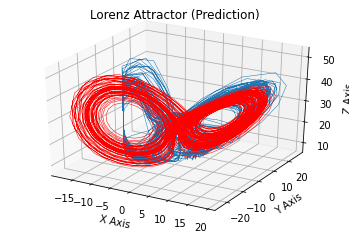

In [282]:
Visualisation = plt.figure().add_subplot(projection='3d')
Visualisation.plot(X_pred_t,Y_pred_t,Z_pred_t, lw=0.5)
Visualisation.plot(x_obs[7100:],y_obs[7100:],z_obs[7100:],color = 'red',lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor (Prediction)")
plt.show()

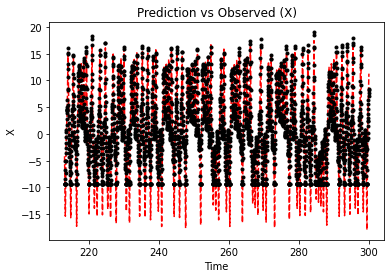

In [330]:
plt.figure()
plt.plot(t_obs[7100:], x_obs[7100:],'--r')
plt.plot(t_obs[7100:], X_pred_t,'.k')
plt.ylabel('X')
plt.xlabel('Time')
plt.title('Prediction vs Observed (X)')
plt.show()

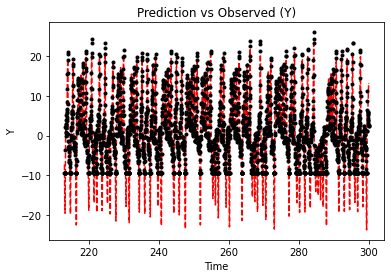

In [331]:
plt.figure()
plt.plot(t_obs[7100:], y_obs[7100:],'--r')
plt.plot(t_obs[7100:], Y_pred_t,'.k')
plt.ylabel('Y')
plt.xlabel('Time')
plt.title('Prediction vs Observed (Y)')
plt.show()

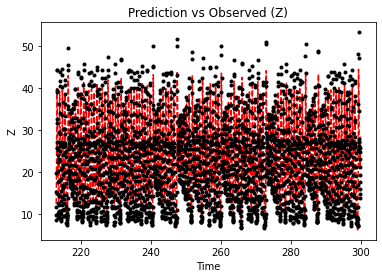

In [332]:
plt.figure()
plt.plot(t_obs[7100:], z_obs[7100:],'--r')
plt.plot(t_obs[7100:], Z_pred_t,'.k')
plt.ylabel('Z')
plt.xlabel('Time')
plt.title('Prediction vs Observed (Z)')
plt.show()

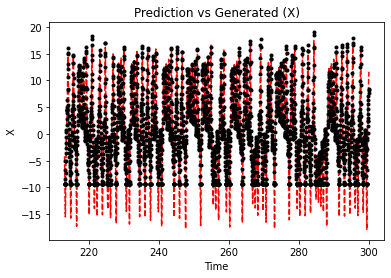

In [326]:
plt.figure()
plt.plot(t_gen[213000:], x[213000:],'--r')
plt.plot(t_obs[7100:], X_pred_t,'.k')
plt.ylabel('X')
plt.xlabel('Time')
plt.title('Prediction vs Generated (X)')
plt.show()

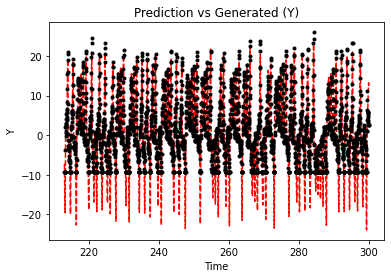

In [327]:
plt.figure()
plt.plot(t_gen[213000:], y[213000:],'--r')
plt.plot(t_obs[7100:], Y_pred_t,'.k')
plt.ylabel('Y')
plt.xlabel('Time')
plt.title('Prediction vs Generated (Y)')
plt.show()

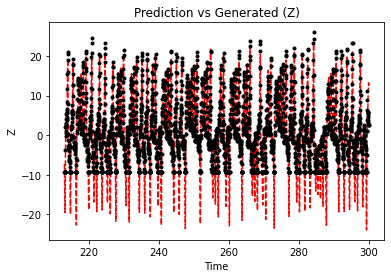

In [328]:
plt.figure()
plt.plot(t_gen[213000:], y[213000:],'--r')
plt.plot(t_obs[7100:], Y_pred_t,'.k')
plt.ylabel('Z')
plt.xlabel('Time')
plt.title('Prediction vs Generated (Z)')
plt.show()

#L1 , L2 and H1 Error Metrics 

In [329]:
Loss1 = abs(predicted_values - actual_values)
L1 = 0
for i in range (2890):
  for j in range(3):
    for k in range(10):
      L1 = L1 + Loss1[i][j][k]
L1_averaged = L1/10
print(L1_averaged)

30886.638091135188


In [241]:
Loss2 = predicted_values - actual_values
L2=0
for i in range (2890):
  for j in range(3):
    for k in range(10):
      L2 = L2 + (Loss2[i][j][k])*(Loss2[i][j][k])
L2_averaged = L2/10
print(L2_averaged)

215907.6878337842


In [246]:
Huber = predicted_values - actual_values
H1=0
delta = 0.001
for i in range (2890):
  for j in range(3):
    for k in range(10):
      if abs(Huber[i][j][k]) <= delta :
        H1 = H1 + 0.5*((Huber[i][j][k])*(Huber[i][j][k]))
      else:
        H1 = H1 + delta*Huber[i][j][k] - 0.5*delta*delta
Huber_averaged = H1/10
print(Huber_averaged)

-1.6896118581968538


#Moving Average Filter - MLP Model
___

##Formula being Used -> Moving Window of size 15 used:
####Causal -> X(t) = [x(t) + x(t-1) ... + x(t-14)]/15 
####Non - Causal -> X(t) = [x(t-7) + x(t-6)... + x(t)... + x(t+6) + x(t+7)]/15




##Formation of the Causal and Non-Causal X Y Z values

In [60]:
x_obs_cs= np.zeros(10000)
for i in range (14,10000):
  x_obs_cs[i] = (x_obs[i] + x_obs[i-1] + x_obs[i-2] + x_obs[i-3] + x_obs[i-4] + x_obs[i-5] + x_obs[i-6] + x_obs[i-7] + x_obs[i-8] + x_obs[i-9] + x_obs[i-10] + x_obs[i-11] + x_obs[i-12] + x_obs[i-13] +x_obs[i-14])/15


In [61]:
y_obs_cs= np.zeros(10000)
for i in range (14,10000):
  y_obs_cs[i] = (y_obs[i] + y_obs[i-1] + y_obs[i-2] + y_obs[i-3] + y_obs[i-4] + y_obs[i-5] + y_obs[i-6] + y_obs[i-7] + y_obs[i-8] + y_obs[i-9] + y_obs[i-10] + y_obs[i-11] + y_obs[i-12] + y_obs[i-13] +y_obs[i-14])/15


In [62]:
z_obs_cs= np.zeros(10000)
for i in range (14,10000):
  z_obs_cs[i] = (z_obs[i] + z_obs[i-1] + z_obs[i-2] + z_obs[i-3] + z_obs[i-4] + z_obs[i-5] + z_obs[i-6] + z_obs[i-7] + z_obs[i-8] + z_obs[i-9] + z_obs[i-10] + z_obs[i-11] + z_obs[i-12] + z_obs[i-13] +z_obs[i-14])/15

In [63]:
x_obs_ncs= np.zeros(10000)
for i in range (7,9993):
  x_obs_ncs[i] = (x_obs[i] + x_obs[i-1] + x_obs[i-2] + x_obs[i-3] + x_obs[i-4] + x_obs[i-5] + x_obs[i-6] + x_obs[i-7] + x_obs[i+7] + x_obs[i+1] + x_obs[i+2] + x_obs[i+3] + x_obs[i+4] + x_obs[i+5] +x_obs[i+6])/15


In [64]:
y_obs_ncs= np.zeros(10000)
for i in range (7,9993):
  y_obs_ncs[i] = (y_obs[i] + y_obs[i-1] + y_obs[i-2] + y_obs[i-3] + y_obs[i-4] + y_obs[i-5] + y_obs[i-6] + y_obs[i-7] + y_obs[i+7] + y_obs[i+1] + y_obs[i+2] + y_obs[i+3] + y_obs[i+4] + y_obs[i+5] +y_obs[i+6])/15


In [65]:
z_obs_ncs= np.zeros(10000)
for i in range (7,9993):
  z_obs_ncs[i] = (z_obs[i] + z_obs[i-1] + z_obs[i-2] + z_obs[i-3] + z_obs[i-4] + z_obs[i-5] + z_obs[i-6] + z_obs[i-7] + z_obs[i+7] + z_obs[i+1] + z_obs[i+2] + z_obs[i+3] + z_obs[i+4] + z_obs[i+5] + z_obs[i+6])/15

##0 -> nan

In [66]:
count=0
for i in range (10000):
  if x_obs_cs[i]==0:
    x_obs_cs[i]=np.nan
    count= count + 1
for i in range (10000):
  if y_obs_cs[i]==0:
    y_obs_cs[i]=np.nan
    count= count + 1
for i in range (10000):
  if z_obs_cs[i]==0:
    z_obs_cs[i]=np.nan
    count= count + 1
for i in range (10000):
  if x_obs_ncs[i]==0:
    x_obs_ncs[i]=np.nan
    count= count + 1
for i in range (10000):
  if y_obs_ncs[i]==0:
    y_obs_ncs[i]=np.nan
    count= count + 1
for i in range (10000):
  if z_obs_ncs[i]==0:
    z_obs_ncs[i]=np.nan
    count= count + 1

14


##Replacing nan values

In [67]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')

x_obs_cs = x_obs_cs.reshape(-1,1)
imputer.fit(x_obs_cs)
x_obs_cs = imputer.transform(x_obs_cs)
x_obs_cs = x_obs_cs.reshape(1,-1)
x_obs_cs = x_obs_cs[0]

y_obs_cs = y_obs_cs.reshape(-1,1)
imputer.fit(y_obs_cs)
y_obs_cs = imputer.transform(y_obs_cs)
y_obs_cs = y_obs_cs.reshape(1,-1)
y_obs_cs = y_obs_cs[0]

z_obs_cs = z_obs_cs.reshape(-1,1)
imputer.fit(z_obs_cs)
z_obs_cs = imputer.transform(z_obs_cs)
z_obs_cs = z_obs_cs.reshape(1,-1)
z_obs_cs = z_obs_cs[0]

x_obs_ncs = x_obs_ncs.reshape(-1,1)
imputer.fit(x_obs_ncs)
x_obs_ncs = imputer.transform(x_obs_ncs)
x_obs_ncs = x_obs_ncs.reshape(1,-1)
x_obs_ncs = x_obs_ncs[0]

y_obs_ncs = y_obs_ncs.reshape(-1,1)
imputer.fit(y_obs_ncs)
y_obs_ncs = imputer.transform(y_obs_ncs)
y_obs_ncs = y_obs_ncs.reshape(1,-1)
y_obs_ncs = y_obs_ncs[0]

z_obs_ncs = z_obs_ncs.reshape(-1,1)
imputer.fit(z_obs_ncs)
z_obs_ncs = imputer.transform(z_obs_ncs)
z_obs_ncs = z_obs_ncs.reshape(1,-1)
z_obs_ncs = z_obs_ncs[0]

##Forming the causal filter Univariate Inputs

In [247]:
def univariate_series(sequence, n_steps):
  X1_cs, Y1_cs = list(), list()
  for i in range(7000):
    end_input = i + n_steps
    if end_input > 6989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1_cs.append(seq_x)
    Y1_cs.append(seq_y)
  return np.array(X1_cs), np.array(Y1_cs)

X1_cs, Y1_cs = univariate_series(x_obs_cs,100)

def univariate_series1(sequence, n_steps):
  X1_t_cs, Y1_t_cs = list(), list()
  for i in range(7000,10000):
    end_input = i + n_steps
    if end_input > 9989:
      break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1_t_cs.append(seq_x)
    Y1_t_cs.append(seq_y)
  return np.array(X1_t_cs), np.array(Y1_t_cs)
X1_t_cs, Y1_t_cs = univariate_series1(x_obs_cs,100)

def univariate_series(sequence, n_steps):
  X2_cs, Y2_cs = list(), list()
  for i in range(7000):
    end_input = i + n_steps
    if end_input > 6989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2_cs.append(seq_x)
    Y2_cs.append(seq_y)
  return np.array(X2_cs), np.array(Y2_cs)

X2_cs, Y2_cs = univariate_series(y_obs_cs,100)

def univariate_series1(sequence, n_steps):
  X2_t_cs, Y2_t_cs = list(), list()
  for i in range(7000,10000):
    end_input = i + n_steps
    if end_input > 9989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2_t_cs.append(seq_x)
    Y2_t_cs.append(seq_y)
  return np.array(X2_t_cs), np.array(Y2_t_cs)
X2_t_cs, Y2_t_cs = univariate_series1(y_obs_cs,100)

def univariate_series(sequence, n_steps):
  X3_cs, Y3_cs = list(), list()
  for i in range(7000):
    end_input = i + n_steps
    if end_input > 6989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3_cs.append(seq_x)
    Y3_cs.append(seq_y)
  return np.array(X3_cs), np.array(Y3_cs)

X3_cs, Y3_cs = univariate_series(z_obs_cs,100)

def univariate_series1(sequence, n_steps):
  X3_t_cs, Y3_t_cs = list(), list()
  for i in range(7000,10000):
    end_input = i + n_steps
    if end_input > 9989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3_t_cs.append(seq_x)
    Y3_t_cs.append(seq_y)
  return np.array(X3_t_cs), np.array(Y3_t_cs)
X3_t_cs, Y3_t_cs = univariate_series1(z_obs_cs,100)

##Input Vector Creation

In [248]:
New_X_cs = np.stack([X1_cs,X2_cs,X3_cs], axis=1)
New_Y_cs = np.stack([Y1_cs,Y2_cs,Y3_cs], axis=1)

##Test Vector Creation

In [249]:
New_X_t_cs = np.stack([X1_t_cs,X2_t_cs,X3_t_cs], axis=1)
New_Y_t_cs = np.stack([Y1_t_cs,Y2_t_cs,Y3_t_cs], axis=1)

##MLP Model

In [250]:
import tensorflow as tf 
mlp_cs = tf.keras.models.Sequential()
mlp_cs.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp_cs.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp_cs.add(tf.keras.layers.Dense(units=10))
mlp_cs.compile(optimizer = 'adam', loss = 'mse')
mlp_cs.fit(New_X_cs,New_Y_cs, batch_size = 1, epochs = 100)

Epoch 1/100
6890/6890 [==============================] - 10s 1ms/step - loss: 168.7339
Epoch 2/100
6890/6890 [==============================] - 9s 1ms/step - loss: 93.3133
Epoch 3/100
6890/6890 [==============================] - 9s 1ms/step - loss: 47.2847
Epoch 4/100
6890/6890 [==============================] - 9s 1ms/step - loss: 24.5919
Epoch 5/100
6890/6890 [==============================] - 9s 1ms/step - loss: 16.2027
Epoch 6/100
6890/6890 [==============================] - 9s 1ms/step - loss: 13.5689
Epoch 7/100
6890/6890 [==============================] - 14s 2ms/step - loss: 12.5279
Epoch 8/100
6890/6890 [==============================] - 16s 2ms/step - loss: 11.5266
Epoch 9/100
6890/6890 [==============================] - 18s 3ms/step - loss: 10.9584
Epoch 10/100
6890/6890 [==============================] - 10s 1ms/step - loss: 10.4925
Epoch 11/100
6890/6890 [==============================] - 10s 1ms/step - loss: 10.1433
Epoch 12/100
6890/6890 [==============================] 

##Extraction of Predicted Values

In [251]:
predicted_values_cs = mlp.predict(New_X_t_cs)
actual_values_cs = New_Y_t_cs
def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
X_pred_cs,Y_pred_cs,Z_pred_cs = unstack(predicted_values_cs, axis=1)
X_ac_cs,Y_ac_cs,Z_ac_cs = unstack(actual_values_cs, axis =1)

In [252]:
X_pred_t_cs=np.zeros(2900)
for i in range (2890):
  X_pred_t_cs[i] = X_pred_cs[i][0]
for j in range (10):
  X_pred_t_cs[j+2890] = X_pred_cs[2889][j]

Y_pred_t_cs=np.zeros(2900)
for i in range (2890):
  Y_pred_t_cs[i] = Y_pred_cs[i][0]
for j in range (10):
  Y_pred_t_cs[j+2890] = Y_pred_cs[2889][j]

Z_pred_t_cs=np.zeros(2900)
for i in range (2890):
  Z_pred_t_cs[i] = Z_pred_cs[i][0]
for j in range (10):
  Z_pred_t_cs[j+2890] = Z_pred_cs[2889][j]  

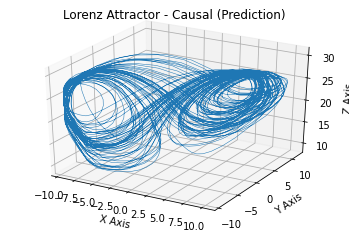

In [312]:
Visualisation = plt.figure().add_subplot(projection='3d')
Visualisation.plot(X_pred_t_cs,Y_pred_t_cs,Z_pred_t_cs, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor - Causal (Prediction)")
plt.show()

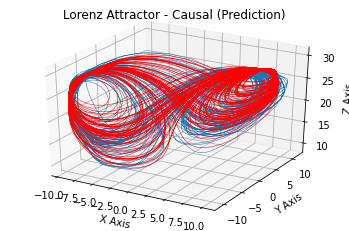

In [281]:
Visualisation = plt.figure().add_subplot(projection='3d')
Visualisation.plot(X_pred_t_cs,Y_pred_t_cs,Z_pred_t_cs, lw=0.5)
Visualisation.plot(x_obs_cs[7100:],y_obs_cs[7100:],z_obs_cs[7100:],color = 'red',lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor - Causal (Prediction)")
plt.show()

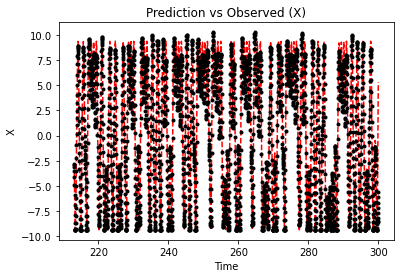

In [334]:
plt.figure()
plt.plot(t_obs[7100:], x_obs_cs[7100:],'--r')
plt.plot(t_obs[7100:], X_pred_t_cs,'.k')
plt.ylabel('X')
plt.xlabel('Time')
plt.title('Prediction vs Observed (X)')
plt.show()

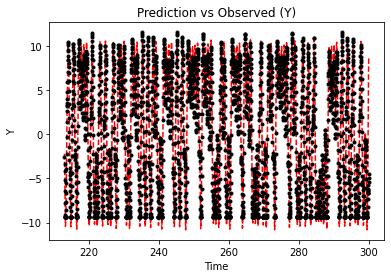

In [339]:
plt.figure()
plt.plot(t_obs[7100:], y_obs_cs[7100:],'--r')
plt.plot(t_obs[7100:], Y_pred_t_cs,'.k')
plt.ylabel('Y')
plt.xlabel('Time')
plt.title('Prediction vs Observed (Y)')
plt.show()

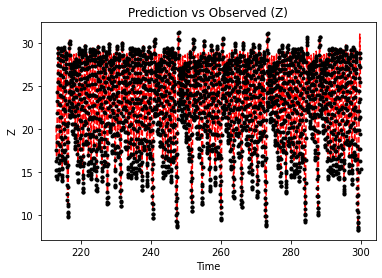

In [338]:
plt.figure()
plt.plot(t_obs[7100:], z_obs_cs[7100:],'--r')
plt.plot(t_obs[7100:], Z_pred_t_cs,'.k')
plt.ylabel('Z')
plt.xlabel('Time')
plt.title('Prediction vs Observed (Z)')
plt.show()

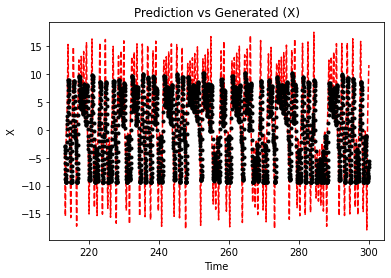

In [337]:
plt.figure()
plt.plot(t_gen[213000:], x[213000:],'--r')
plt.plot(t_obs[7100:], X_pred_t_cs,'.k')
plt.ylabel('X')
plt.xlabel('Time')
plt.title('Prediction vs Generated (X)')
plt.show()

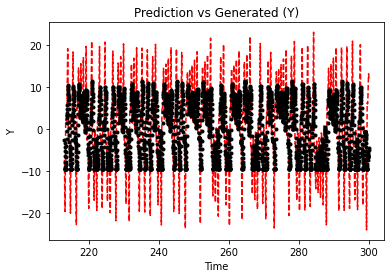

In [321]:
plt.figure()
plt.plot(t_gen[213000:], y[213000:],'--r')
plt.plot(t_obs[7100:], Y_pred_t_cs,'.k')
plt.ylabel('Y')
plt.xlabel('Time')
plt.title('Prediction vs Generated (Y)')
plt.show()

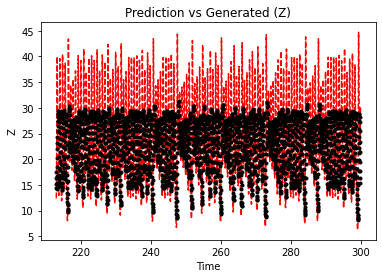

In [320]:
plt.figure()
plt.plot(t_gen[213000:], z[213000:],'--r')
plt.plot(t_obs[7100:], Z_pred_t_cs,'.k')
plt.ylabel('Z')
plt.xlabel('Time')
plt.title('Prediction vs Generated (Z)')
plt.show()

#L1 , L2 and H1 Error Metrics 

In [254]:
Loss1_cs = abs(predicted_values_cs - actual_values_cs)
L1_cs = 0
for i in range (2890):
  for j in range(3):
    for k in range(10):
      L1_cs = L1_cs + Loss1_cs[i][j][k]
L1_averaged_cs = L1_cs/10
print(L1_averaged_cs)

21682.26562532714


In [255]:
Loss2_cs = predicted_values_cs - actual_values_cs
L2_cs = 0
for i in range (2890):
  for j in range(3):
    for k in range(10):
      L2_cs = L2_cs + (Loss2_cs[i][j][k])*(Loss2_cs[i][j][k])
L2_averaged_cs = L2_cs/10
print(L2_averaged_cs)

105411.21415581982


In [256]:
Huber_cs = predicted_values_cs - actual_values_cs
H1_cs=0
delta = 0.001
for i in range (2890):
  for j in range(3):
    for k in range(10):
      if abs(Huber_cs[i][j][k]) <= delta :
        H1_cs = H1_cs + 0.5*((Huber_cs[i][j][k])*(Huber_cs[i][j][k]))
      else:
        H1_cs = H1_cs + delta*Huber_cs[i][j][k] - 0.5*delta*delta
Huber_averaged_cs = H1_cs/10
print(Huber_averaged_cs)

-8.20777701688387


##Forming the non-causal filter Univariate Inputs

In [257]:
def univariate_series(sequence, n_steps):
  X1_ncs, Y1_ncs = list(), list()
  for i in range(7000):
    end_input = i + n_steps
    if end_input > 6989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1_ncs.append(seq_x)
    Y1_ncs.append(seq_y)
  return np.array(X1_ncs), np.array(Y1_ncs)

X1_ncs, Y1_ncs = univariate_series(x_obs_ncs,100)

def univariate_series1(sequence, n_steps):
  X1_t_ncs, Y1_t_ncs = list(), list()
  for i in range(7000,10000):
    end_input = i + n_steps
    if end_input > 9989:
      break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1_t_ncs.append(seq_x)
    Y1_t_ncs.append(seq_y)
  return np.array(X1_t_ncs), np.array(Y1_t_ncs)
 
X1_t_ncs, Y1_t_ncs = univariate_series1(x_obs_ncs,100)

def univariate_series(sequence, n_steps):
  X2_ncs, Y2_ncs = list(), list()
  for i in range(7000):
    end_input = i + n_steps
    if end_input > 6989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2_ncs.append(seq_x)
    Y2_ncs.append(seq_y)
  return np.array(X2_ncs), np.array(Y2_ncs)

X2_ncs, Y2_ncs = univariate_series(y_obs_ncs,100)

def univariate_series1(sequence, n_steps):
  X2_t_ncs, Y2_t_ncs = list(), list()
  for i in range(7000,10000):
    end_input = i + n_steps
    if end_input > 9989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2_t_ncs.append(seq_x)
    Y2_t_ncs.append(seq_y)
  return np.array(X2_t_ncs), np.array(Y2_t_ncs)
X2_t_ncs, Y2_t_ncs = univariate_series1(y_obs_ncs,100)

def univariate_series(sequence, n_steps):
  X3_ncs, Y3_ncs = list(), list()
  for i in range(7000):
    end_input = i + n_steps
    if end_input > 6989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3_ncs.append(seq_x)
    Y3_ncs.append(seq_y)
  return np.array(X3_ncs), np.array(Y3_ncs)

X3_ncs, Y3_ncs = univariate_series(z_obs_ncs,100)

def univariate_series1(sequence, n_steps):
  X3_t_ncs, Y3_t_ncs = list(), list()
  for i in range(7000,10000):
    end_input = i + n_steps
    if end_input > 9989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3_t_ncs.append(seq_x)
    Y3_t_ncs.append(seq_y)
  return np.array(X3_t_ncs), np.array(Y3_t_ncs)
X3_t_ncs, Y3_t_ncs = univariate_series1(z_obs_ncs,100)

##Input Vector Creation

In [258]:
New_X_ncs = np.stack([X1_ncs,X2_ncs,X3_ncs], axis=1)
New_Y_ncs = np.stack([Y1_ncs,Y2_ncs,Y3_ncs], axis=1)

##Test Vector Creation

In [259]:
New_X_t_ncs = np.stack([X1_t_ncs,X2_t_ncs,X3_t_ncs], axis=1)
New_Y_t_ncs = np.stack([Y1_t_ncs,Y2_t_ncs,Y3_t_ncs], axis=1)

##MLP Model

In [260]:
import tensorflow as tf 
mlp_ncs = tf.keras.models.Sequential()
mlp_ncs.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp_ncs.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp_ncs.add(tf.keras.layers.Dense(units=10))
mlp_ncs.compile(optimizer = 'adam', loss = 'mse')
mlp_ncs.fit(New_X_ncs,New_Y_ncs, batch_size = 1, epochs = 100)

Epoch 1/100
6890/6890 [==============================] - 10s 1ms/step - loss: 33.9248
Epoch 2/100
6890/6890 [==============================] - 9s 1ms/step - loss: 17.3770
Epoch 3/100
6890/6890 [==============================] - 9s 1ms/step - loss: 12.8941
Epoch 4/100
6890/6890 [==============================] - 9s 1ms/step - loss: 10.6785
Epoch 5/100
6890/6890 [==============================] - 9s 1ms/step - loss: 9.7154
Epoch 6/100
6890/6890 [==============================] - 9s 1ms/step - loss: 9.1521
Epoch 7/100
6890/6890 [==============================] - 9s 1ms/step - loss: 8.7460
Epoch 8/100
6890/6890 [==============================] - 9s 1ms/step - loss: 8.5305
Epoch 9/100
6890/6890 [==============================] - 9s 1ms/step - loss: 8.3557
Epoch 10/100
6890/6890 [==============================] - 9s 1ms/step - loss: 8.2492
Epoch 11/100
6890/6890 [==============================] - 9s 1ms/step - loss: 8.0916
Epoch 12/100
6890/6890 [==============================] - 9s 1ms/step

##Extraction of Predicted Values

In [261]:
predicted_values_ncs = mlp.predict(New_X_t_ncs)
actual_values_ncs = New_Y_t_ncs
def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
X_pred_ncs,Y_pred_ncs,Z_pred_ncs = unstack(predicted_values_ncs, axis=1)
X_ac_ncs,Y_ac_ncs,Z_ac_ncs = unstack(actual_values_ncs, axis =1)

In [262]:
X_pred_t_ncs=np.zeros(2900)
for i in range (2890):
  X_pred_t_ncs[i] = X_pred_ncs[i][0]
for j in range (10):
  X_pred_t_ncs[j+2890] = X_pred_ncs[2889][j]

Y_pred_t_ncs=np.zeros(2900)
for i in range (2890):
  Y_pred_t_ncs[i] = Y_pred_ncs[i][0]
for j in range (10):
  Y_pred_t_ncs[j+2890] = Y_pred_ncs[2889][j]

Z_pred_t_ncs=np.zeros(2900)
for i in range (2890):
  Z_pred_t_ncs[i] = Z_pred_ncs[i][0]
for j in range (10):
  Z_pred_t_ncs[j+2890] = Z_pred_ncs[2889][j]  

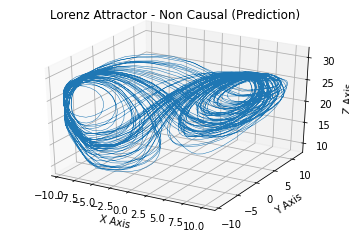

In [315]:
Visualisation = plt.figure().add_subplot(projection='3d')
Visualisation.plot(X_pred_t_ncs,Y_pred_t_ncs,Z_pred_t_ncs, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor - Non Causal (Prediction)")
plt.show()

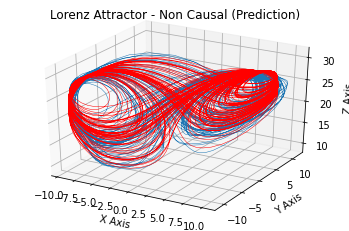

In [314]:
Visualisation = plt.figure().add_subplot(projection='3d')
Visualisation.plot(X_pred_t_ncs,Y_pred_t_ncs,Z_pred_t_ncs, lw=0.5)
Visualisation.plot(x_obs_ncs[7100:],y_obs_ncs[7100:],z_obs_ncs[7100:],color = 'red',lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor - Non Causal (Prediction)")
plt.show()

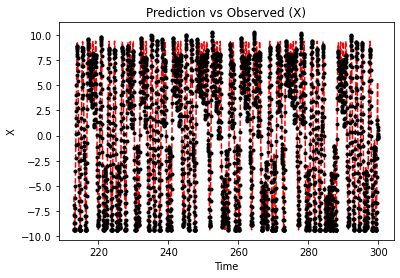

In [340]:
plt.figure()
plt.plot(t_obs[7100:], x_obs_ncs[7100:],'--r')
plt.plot(t_obs[7100:], X_pred_t_ncs,'.k')
plt.ylabel('X')
plt.xlabel('Time')
plt.title('Prediction vs Observed (X)')
plt.show()

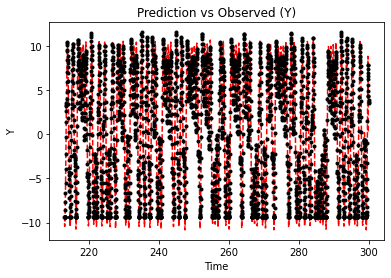

In [343]:
plt.figure()
plt.plot(t_obs[7100:], y_obs_ncs[7100:],'--r')
plt.plot(t_obs[7100:], Y_pred_t_ncs,'.k')
plt.ylabel('Y')
plt.xlabel('Time')
plt.title('Prediction vs Observed (Y)')
plt.show()

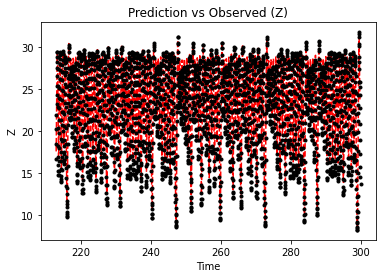

In [342]:
plt.figure()
plt.plot(t_obs[7100:], z_obs_ncs[7100:],'--r')
plt.plot(t_obs[7100:], Z_pred_t_ncs,'.k')
plt.ylabel('Z')
plt.xlabel('Time')
plt.title('Prediction vs Observed (Z)')
plt.show()

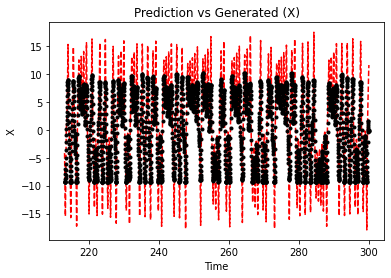

In [317]:
plt.figure()
plt.plot(t_gen[213000:], x[213000:],'--r')
plt.plot(t_obs[7100:], X_pred_t_ncs,'.k')
plt.ylabel('X')
plt.xlabel('Time')
plt.title('Prediction vs Generated (X)')
plt.show()

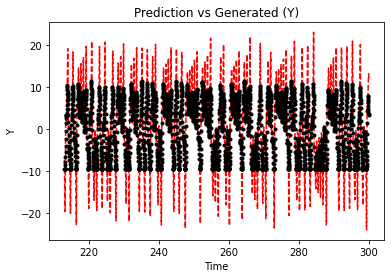

In [318]:
plt.figure()
plt.plot(t_gen[213000:], y[213000:],'--r')
plt.plot(t_obs[7100:], Y_pred_t_ncs,'.k')
plt.ylabel('Y')
plt.xlabel('Time')
plt.title('Prediction vs Generated (Y)')
plt.show()

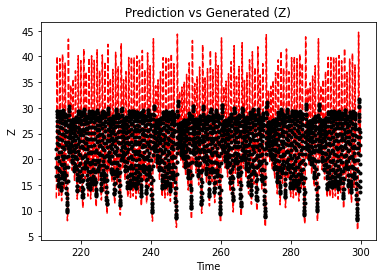

In [319]:
plt.figure()
plt.plot(t_gen[213000:], z[213000:],'--r')
plt.plot(t_obs[7100:], Z_pred_t_ncs,'.k')
plt.ylabel('Z')
plt.xlabel('Time')
plt.title('Prediction vs Generated (Z)')
plt.show()

#L1 , L2 and H1 Error Metrics 

In [265]:
Loss1_ncs = abs(predicted_values_ncs - actual_values_ncs)
L1_ncs = 0
for i in range (2890):
  for j in range(3):
    for k in range(10):
      L1_ncs = L1_ncs + Loss1_ncs[i][j][k]
L1_averaged_ncs = L1_ncs/10
print(L1_averaged_ncs)

21715.68461228527


In [266]:
Loss2_ncs = predicted_values_ncs - actual_values_ncs
L2_ncs = 0
for i in range (2890):
  for j in range(3):
    for k in range(10):
      L2_ncs = L2_ncs + (Loss2_ncs[i][j][k])*(Loss2_ncs[i][j][k])
L2_averaged_ncs = L2_cs/10
print(L2_averaged_ncs)

105411.21415581982


In [267]:
Huber_ncs = predicted_values_ncs - actual_values_ncs
H1_ncs=0
delta = 0.001
for i in range (2890):
  for j in range(3):
    for k in range(10):
      if abs(Huber_ncs[i][j][k]) <= delta :
        H1_ncs = H1_ncs + 0.5*((Huber_ncs[i][j][k])*(Huber_ncs[i][j][k]))
      else:
        H1_ncs = H1_ncs + delta*Huber_ncs[i][j][k] - 0.5*delta*delta
Huber_averaged_ncs = H1/10
print(Huber_averaged_ncs)

-1.6896118581968538
